<a href="https://colab.research.google.com/github/DivyamThapliyal07/Projects/blob/main/ElectricityCostAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df= pd.read_csv("/content/electricity_cost_dataset.csv")

In [5]:
df.head()

,site area,structure type,water consumption,recycling rate,utilisation rate,air qality index,issue reolution time,resident count,electricity cost
0,1360,Mixed-use,2519.0,69,52,188,1,72,1420.0
1,4272,Mixed-use,2324.0,50,76,165,65,261,3298.0
2,3592,Mixed-use,2701.0,20,94,198,39,117,3115.0
3,966,Residential,1000.0,13,60,74,3,35,1575.0
4,4926,Residential,5990.0,23,65,32,57,185,4301.0


In [6]:
df.describe()

,site area,water consumption,recycling rate,utilisation rate,air qality index,issue reolution time,resident count,electricity cost
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,2757.775100,3494.057100,49.598000,64.842200,99.468600,36.402600,85.573100,2837.845000
std,1293.059959,2076.181117,23.430141,20.432965,58.014526,20.623905,107.876179,1106.997441
min,501.000000,1000.000000,10.000000,30.000000,0.000000,1.000000,0.000000,500.000000
25%,1624.000000,1779.000000,29.750000,47.000000,49.000000,19.000000,0.000000,1954.000000
50%,2773.500000,3047.500000,49.000000,65.000000,100.000000,36.000000,39.000000,2760.000000
75%,3874.000000,4811.000000,70.000000,83.000000,150.000000,54.000000,142.000000,3632.000000
max,5000.000000,10894.000000,90.000000,100.000000,200.000000,72.000000,489.000000,6446.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   site area             10000 non-null  int64  
 1   structure type        10000 non-null  object 
 2   water consumption     10000 non-null  float64
 3   recycling rate        10000 non-null  int64  
 4   utilisation rate      10000 non-null  int64  
 5   air qality index      10000 non-null  int64  
 6   issue reolution time  10000 non-null  int64  
 7   resident count        10000 non-null  int64  
 8   electricity cost      10000 non-null  float64
dtypes: float64(2), int64(6), object(1)
memory usage: 703.3+ KB


In [8]:
df.isnull().sum()

,0
site area,0
structure type,0
water consumption,0
recycling rate,0
utilisation rate,0
air qality index,0
issue reolution time,0
resident count,0
electricity cost,0


In [9]:
sns.set_style("whitegrid")

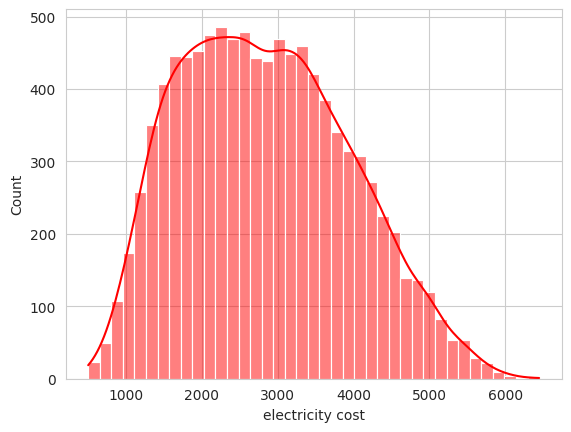

In [10]:
sns.histplot(data=df, x="electricity cost", kde=True, color="red")
plt.show()

In [11]:
cols= ["site area","water consumption","recycling rate","utilisation rate","air qality index","issue reolution time"]

<Figure size 1000x1000 with 0 Axes>

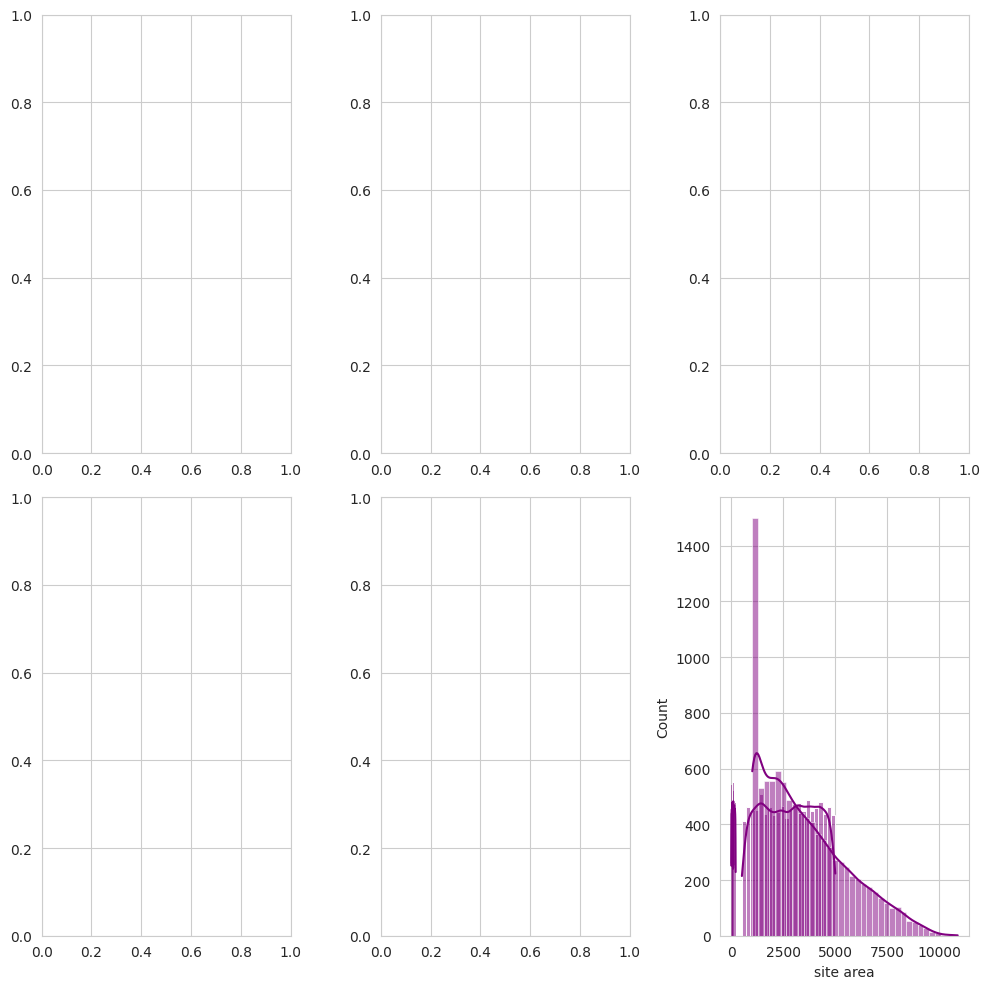

In [12]:
plt.figure(figsize=(10,10))
fig, axes= plt.subplots(2,3, figsize=(10,10))
for i, col in enumerate(cols):
  sns.histplot(data=df, x=col, kde= True, color="purple")
plt.tight_layout()
plt.show()

In [13]:
df["site_cost"]= df.groupby("structure type")["electricity cost"].mean()

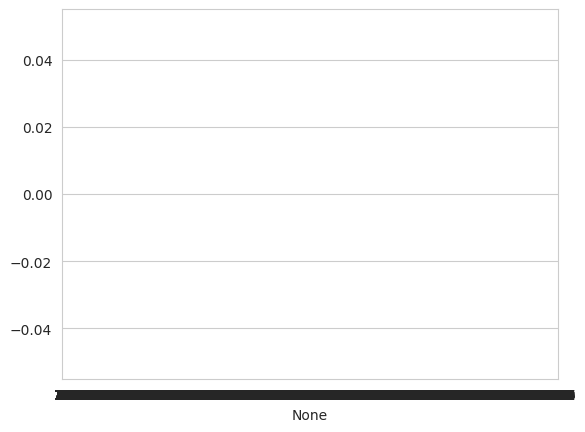

In [14]:
sns.barplot(x=df["site_cost"].index, y=df["site_cost"].values, color="green")
plt.show()

In [15]:
df["site_cost"]

,site_cost
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
9995,NaN
9996,NaN
9997,NaN
9998,NaN


In [16]:


df.groupby("structure type")["electricity cost"].mean()


,electricity cost
structure type,
Commercial,2812.206988
Industrial,3397.109562
Mixed-use,2304.945906
Residential,2992.465347


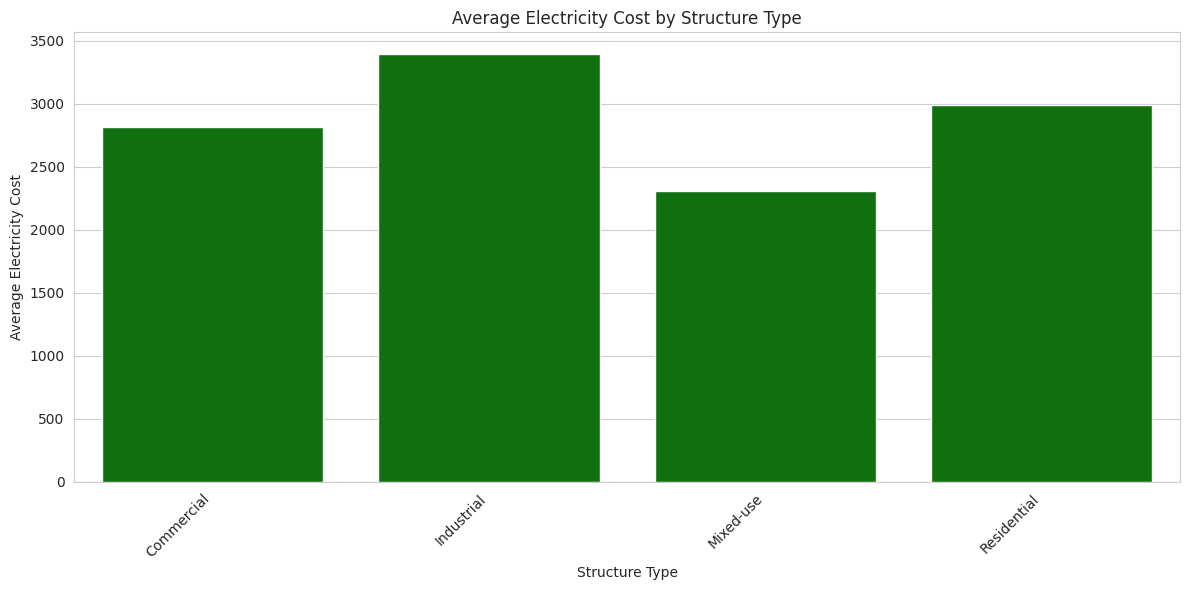

In [17]:

import matplotlib.pyplot as plt
# Visualize the average electricity cost per structure type
plt.figure(figsize=(12, 6))
sns.barplot(x=df.groupby("structure type")["electricity cost"].mean().index,
            y=df.groupby("structure type")["electricity cost"].mean().values,
            color="green")
plt.title("Average Electricity Cost by Structure Type")
plt.xlabel("Structure Type")
plt.ylabel("Average Electricity Cost")
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()

In [18]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, mean_squared_error

In [19]:
le= LabelEncoder()
df["structure type"]=le.fit_transform(df["structure type"])

In [20]:
df.head()

,site area,structure type,water consumption,recycling rate,utilisation rate,air qality index,issue reolution time,resident count,electricity cost,site_cost
0,1360,2,2519.0,69,52,188,1,72,1420.0,NaN
1,4272,2,2324.0,50,76,165,65,261,3298.0,NaN
2,3592,2,2701.0,20,94,198,39,117,3115.0,NaN
3,966,3,1000.0,13,60,74,3,35,1575.0,NaN
4,4926,3,5990.0,23,65,32,57,185,4301.0,NaN


In [21]:
X=df.drop(["electricity cost","site_cost"], axis=1)
y= df["electricity cost"]

In [22]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
LR= LinearRegression()
LR.fit(X_train, y_train)
y_pred_LR= LR.predict(X_test)


In [24]:
mse_LR= mean_squared_error(y_test, y_pred_LR)

In [25]:
mse_LR

234848.76502181482

In [26]:
residuals_LR= y_test-y_pred_LR

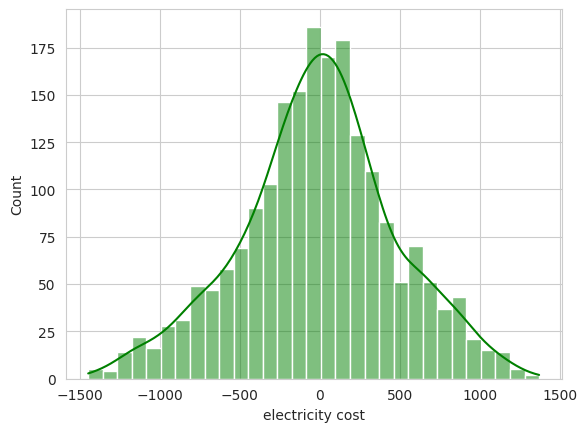

In [27]:
sns.histplot(residuals_LR, kde=True, color="green")
plt.show()

In [28]:
lasso=Lasso()

In [29]:
lasso.fit(X_train, y_train)
lasso_pred= lasso.predict(X_test)

In [30]:
mse_lasso= mean_squared_error(y_test, lasso_pred)

In [31]:
mse_lasso

234828.87430638383

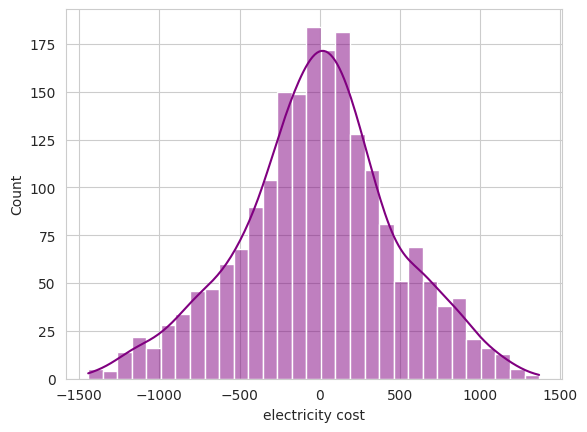

In [32]:
residuals_lasso= y_test-lasso_pred
sns.histplot(residuals_lasso, kde=True, color="purple")
plt.show()

In [33]:
ridge= Ridge()

In [34]:
ridge.fit(X_train, y_train)
y_pred_ridge= ridge.predict(X_test)
mse_ridge= mean_squared_error(y_test, y_pred_LR)
mse_ridge

234848.76502181482

In [35]:
dt= DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_pred=dt.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.0005


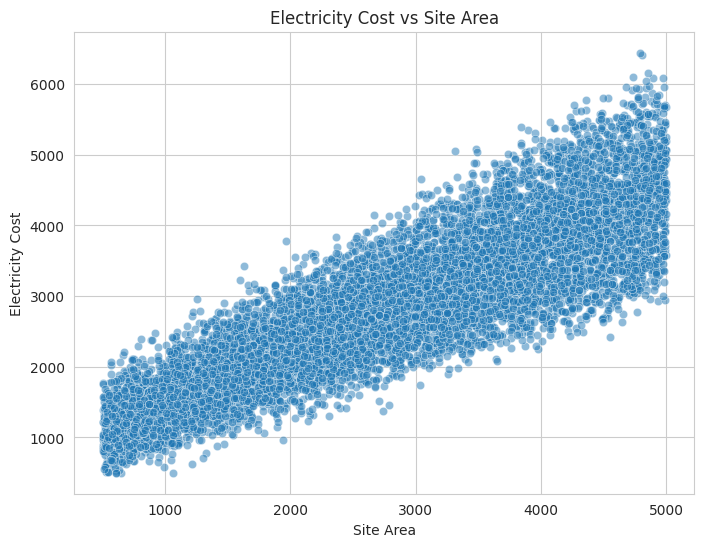

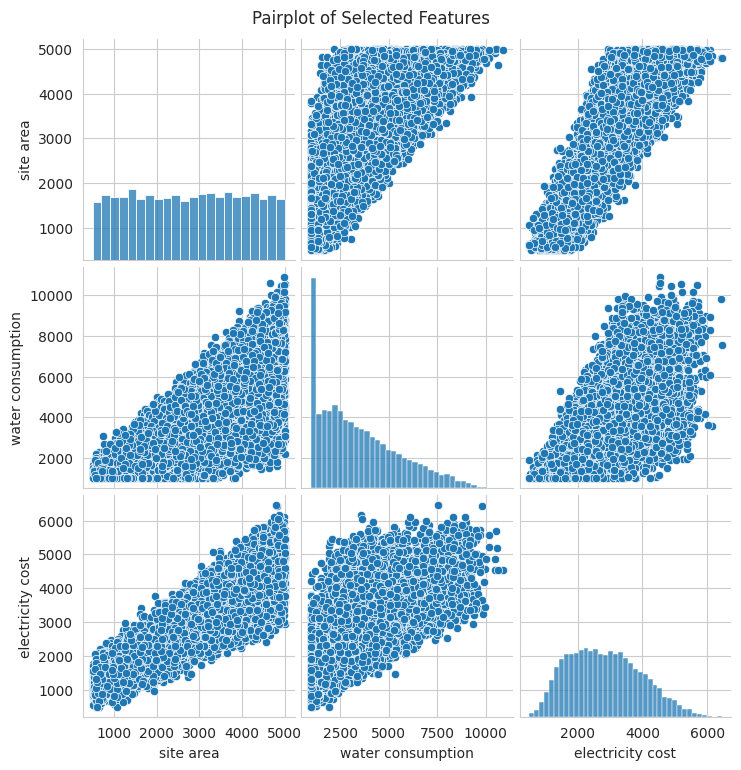

In [36]:
import matplotlib.pyplot as plt
# Scatter plot of 'site area' vs 'electricity cost'
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="site area", y="electricity cost", alpha=0.5)
plt.title("Electricity Cost vs Site Area")
plt.xlabel("Site Area")
plt.ylabel("Electricity Cost")
plt.show()

# Pairplot for selected features
sns.pairplot(df[["site area", "water consumption", "electricity cost"]])
plt.suptitle("Pairplot of Selected Features", y=1.02) # Adjust title position
plt.show()


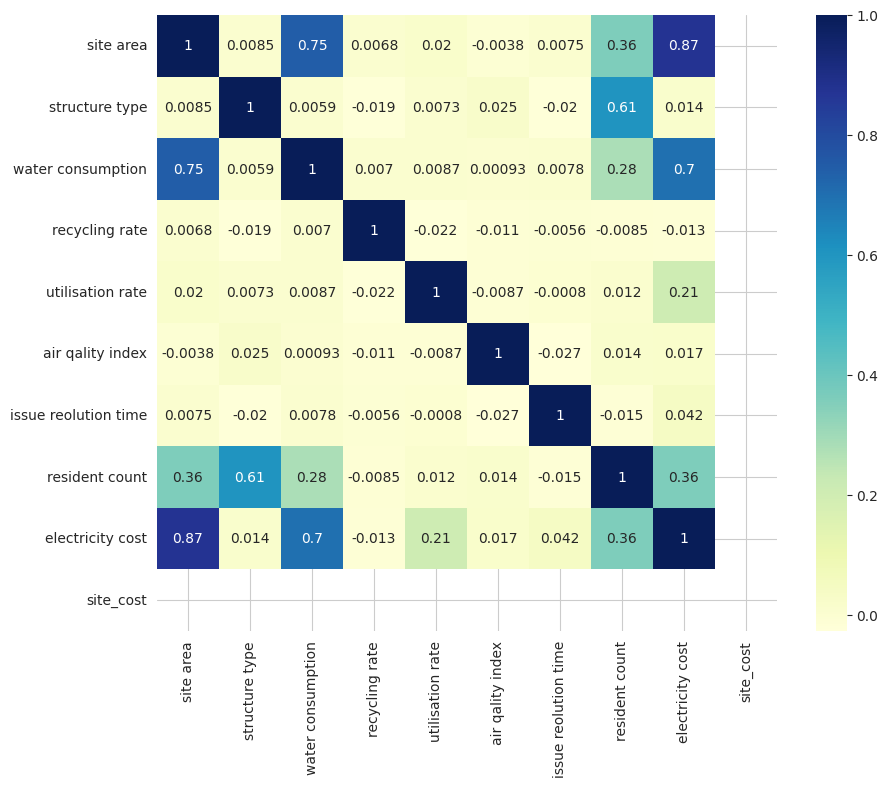

In [37]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu")
plt.show()